## Take a existing microtonal piece of mine and use the algorithmic tools to explore it

This notebook takes a piece I wrote in 2018: Balloon Drum Music for Piano, which itself is a modification of a piece called Balloon Drum Music from 2005. The structure of the piece is a verse in B♭ major, followed by a bridge of interesting chord changes, then back to the B♭ major.

Here is the structure with the Sagittal① notation for the notes.

<img src='http://ripnread.com/listen/BalloonDrumKeys.jpg' >



This version uses the tonality diamond to the 31-limit, constructed by calculating the overtones (referred to as otonalities) up to number 31, then the undertones (referred to as utonalities) on each of those overtones. There are 16 scales of 16 notes each, either 16 otonal scales on the 16 utonalities, or 16 utonal scales on the 16 otonalities. When you eliminate duplicate notes, you end up with 214 scale degrees per octave. I found it easier to work with if I kept the duplicate note numbers, so I use all 256 in the python notebooks.

It an extension of the work of Harry Partch and his Tonality Diamond, which went to the 11-limit. 

I started my microtonal journey with the Partch 11-limit diamond. I later explored higher dimensions by using the 15-limit, which extends the over/under tones to the 15th overtone. The 15th overtone on C is B♮, which is convenient for some modulations. It also includes the 13th overtone, a challenging interval in the same way that the 11th overtone in Partch's 11-limit diamond can be jarring to the ear.  I hoped to discover more unique sounds in the upper and lower regions of the diamond by extending it to the next logical step: 31-limit. As Partch once said, "There's a whole world between the 1:1 and the 2:1". Or he might not have said that. Who knows?

There is a more complete explanation of the tuning here: __[here](http://ripnread.com/partch-tonality-diamond-to-the-31-limit/)__.

My diamond image in that link has the Sagittal① symbols and rations for each of the notes. 

__[Tonality Diamond to the 31-limit](http://ripnread.com/listen/Diamond_31-limit.jpg)__

Below is an image of what I've always referred to as the Cassandra version of the diamond, which is more compact than the diamond.
The otonal scales read from left to right, and the utonal scales read from top to bottom. So you have otonal on C in the upper left corner, then reading down, you get otonal on B-, A++, A♮, G+, G-, F++, F-, E♭, D++, D+, D-, D♭, & C+. The utonal scales start with the same C in the upper left corner, followed by reading to the right, you see Utonal on D♭, D+, D++, E-, F-, F♯, G♭, G♮, G++, A♭, A+, A♯, B♭, B-, & B++. 

① Sagittal is a font designed for helping musicians more easily visualize the tuning in musical scores. More about that __[here](https://sagittal.org/)__.

<img src='http://ripnread.com/listen/31-limit-diamond.jpg'>

To run the code, I've found that python pip does a great job with locating and installing the required modules. Details are to be found in the README.md file in the Github repo. 

This version has moved most of the helper functions to a python file to declutter the notebook.

In [2]:
import diamond_music_utils as dmu
import matplotlib.pyplot as plt
from importlib import reload
import time
# reload(dmu)
import numpy as np
import pprint
pp = pprint.PrettyPrinter(sort_dicts=False)
from fractions import Fraction
import copy
import logging
import os

from numpy.random import default_rng
rng = np.random.default_rng()
CSD_FILE = 'ball3.csd'
jupyter_log = 'ball3.log'
CS_LOGNAME = 'ball3.log'
WAV_OUT = '/home/prent/Music/sflib/ball3.wav'
CON_OUT = '/home/prent/Music/sflib/ball3-t'

In [3]:
all_ratios = np.array(dmu.build_all_ratios())
ratio_strings = dmu.build_ratio_strings(all_ratios) # create a (16,16) array of ratios in string form. Change those that are '1' to '1/1'
print(f'{all_ratios.shape = }')
# print the ratios as fractions
limit = 31
end_denom = limit + 1
start_denom = (end_denom) // 2
o_numerator = np.arange(start_denom, end_denom, 1) # create a list of overtones
u_denominator = np.arange(start_denom, end_denom, 1) # create a list of undertones
print(f'Tonality Diamond in the Cassandra orientation to the {limit}-limit', end='')
i = 0
for oton_root in u_denominator:
    print(" ")
    for overtone in o_numerator:
        print(f'{str(Fraction(all_ratios[i]).limit_denominator())}', end = '\t')
        i += 1
all_ratio_strings = ratio_strings.reshape(256,)
dmu.start_logger(jupyter_log)
logging.info(f'Starting to log to {jupyter_log}')

all_ratios.shape = (256,)
Tonality Diamond in the Cassandra orientation to the 31-limit 
1	17/16	9/8	19/16	5/4	21/16	11/8	23/16	3/2	25/16	13/8	27/16	7/4	29/16	15/8	31/16	 
32/17	1	18/17	19/17	20/17	21/17	22/17	23/17	24/17	25/17	26/17	27/17	28/17	29/17	30/17	31/17	 
16/9	17/9	1	19/18	10/9	7/6	11/9	23/18	4/3	25/18	13/9	3/2	14/9	29/18	5/3	31/18	 
32/19	34/19	36/19	1	20/19	21/19	22/19	23/19	24/19	25/19	26/19	27/19	28/19	29/19	30/19	31/19	 
8/5	17/10	9/5	19/10	1	21/20	11/10	23/20	6/5	5/4	13/10	27/20	7/5	29/20	3/2	31/20	 
32/21	34/21	12/7	38/21	40/21	1	22/21	23/21	8/7	25/21	26/21	9/7	4/3	29/21	10/7	31/21	 
16/11	17/11	18/11	19/11	20/11	21/11	1	23/22	12/11	25/22	13/11	27/22	14/11	29/22	15/11	31/22	 
32/23	34/23	36/23	38/23	40/23	42/23	44/23	1	24/23	25/23	26/23	27/23	28/23	29/23	30/23	31/23	 
4/3	17/12	3/2	19/12	5/3	7/4	11/6	23/12	1	25/24	13/12	9/8	7/6	29/24	5/4	31/24	 
32/25	34/25	36/25	38/25	8/5	42/25	44/25	46/25	48/25	1	26/25	27/25	28/25	29/25	6/5	31/25	 
16/13	17/13	18/13	19/13	20/13	21/13

## Make a multivoice piece
This is the first attempt at composing a multivoice piece where every note is written out. Later I can automate the process of choosing variables

In [4]:
# track the name, the start time, and the instrument number
voice_time = {
    "fp1": {"full_name": "finger piano 1", "start": 0, "csound_voice": 1, "time_tracker_number": 0},
    "fp2": {"full_name": "finger piano 2", "start": 0, "csound_voice": 1, "time_tracker_number": 1},
    "fp3": {"full_name": "finger piano 3", "start": 0, "csound_voice": 1, "time_tracker_number": 2},
    "fp4": {"full_name": "finger piano 4", "start": 0, "csound_voice": 1, "time_tracker_number": 3},
    "fp5": {"full_name": "finger piano 5", "start": 0, "csound_voice": 1, "time_tracker_number": 4},
    "fp6": {"full_name": "finger piano 6", "start": 0, "csound_voice": 1, "time_tracker_number": 5},
    "bn1": {"full_name": "bass finger piano 1", "start": 0, "csound_voice": 2, "time_tracker_number": 6},
    "bn2": {"full_name": "bass finger piano 2", "start": 0, "csound_voice": 2, "time_tracker_number": 7},
    "bd1": {"full_name": "bass balloon drum 1", "start": 0, "csound_voice": 3, "time_tracker_number": 8},
    "bd2": {"full_name": "bass balloon drum 2", "start": 0, "csound_voice": 3, "time_tracker_number": 9},
    "bd3": {"full_name": "bass balloon drum 3", "start": 0, "csound_voice": 3, "time_tracker_number": 10},
    "bd4": {"full_name": "bass balloon drum 4", "start": 0, "csound_voice": 3, "time_tracker_number": 11},
    "bm1": {"full_name": "medium balloon drum 1", "start": 0, "csound_voice": 4, "time_tracker_number": 12},
    "bm2": {"full_name": "medium balloon drum 2", "start": 0, "csound_voice": 4, "time_tracker_number": 13},
    "bm3": {"full_name": "medium balloon drum 3", "start": 0, "csound_voice": 4, "time_tracker_number": 14},
    "bm4": {"full_name": "medium balloon drum 4", "start": 0, "csound_voice": 4, "time_tracker_number": 15},
    "bh1": {"full_name": "high balloon drum 1", "start": 0, "csound_voice": 5, "time_tracker_number": 16},
    "bh2": {"full_name": "high balloon drum 2", "start": 0, "csound_voice": 5, "time_tracker_number": 17},
    "bh3": {"full_name": "high balloon drum 3", "start": 0, "csound_voice": 5, "time_tracker_number": 18},
    "bh4": {"full_name": "high balloon drum 4", "start": 0, "csound_voice": 5, "time_tracker_number": 19},
    "bf1": {"full_name": "bass flute 1", "start": 0, "csound_voice": 6, "time_tracker_number": 20},
    "bf2": {"full_name": "bass flute 2", "start": 0, "csound_voice": 6, "time_tracker_number": 21},
    "bf3": {"full_name": "bass flute 3", "start": 0, "csound_voice": 6, "time_tracker_number": 22},
    "bf4": {"full_name": "bass flute 4", "start": 0, "csound_voice": 6, "time_tracker_number": 23},
    "ob1": {"full_name": "oboe", "start": 0, "csound_voice": 7, "time_tracker_number": 24},
    "cl1": {"full_name": "clarinet", "start": 0, "csound_voice": 8, "time_tracker_number": 25},
    "bs1": {"full_name": "bassoon", "start": 0, "csound_voice": 9, "time_tracker_number": 26},
    "fr1": {"full_name": "french horn", "start": 0, "csound_voice": 10, "time_tracker_number": 27},
    "btg": {"full_name": "baritone guitar", "start": 0, "csound_voice": 11, "time_tracker_number": 28},
    "ob2": {"full_name": "oboe", "start": 0, "csound_voice": 7, "time_tracker_number": 29},
    "cl2": {"full_name": "clarinet", "start": 0, "csound_voice": 8, "time_tracker_number": 30},
    "bs2": {"full_name": "bassoon", "start": 0, "csound_voice": 9, "time_tracker_number": 31},
    "fr2": {"full_name": "french horn", "start": 0, "csound_voice": 10, "time_tracker_number": 32},
    
}


In [5]:
# Convert a ratio into a cent value and back again
root = '8/7'
print(f'{root = }')
ratio_decimal = dmu.ratio_string_to_float(root)
print(f'{dmu.ratio_to_cents(ratio_decimal) = }')
print(f'{str(Fraction(ratio_decimal).limit_denominator(100)) = }')
root = '7/8'
print(f'{root = }')
ratio_decimal = dmu.ratio_string_to_float(root)
print(f'{dmu.ratio_to_cents(ratio_decimal) = }')
print(f'{str(Fraction(ratio_decimal).limit_denominator(100)) = }')

root = '8/7'
dmu.ratio_to_cents(ratio_decimal) = 231.2
str(Fraction(ratio_decimal).limit_denominator(100)) = '8/7'
root = '7/8'
dmu.ratio_to_cents(ratio_decimal) = -231.2
str(Fraction(ratio_decimal).limit_denominator(100)) = '7/8'


In [6]:
# need a systematic search of all the slides to minimize the maximum distance, defined as more than 1.3 or less than 0.75
# vary the inversions of the two chords.
# def build_chords(mode, ratio, rank, inversion):

stored_gliss = dmu.init_stored_gliss() 
bridge_chords = {0: {0: {"mode": "oton", "ratio": "16/9", "rank": "A"}, 
                     1: {"mode": "oton", "ratio": "8/7", "rank": "A"}},
                 1: {0: {"mode": "oton", "ratio": "8/7", "rank": "A"}, 
                     1: {"mode": "uton", "ratio": "9/8", "rank": "A"}},
                 2: {0: {"mode": "uton", "ratio": "9/8", "rank": "A"}, 
                     1: {"mode": "oton", "ratio": "16/15", "rank": "A"}},
                 3: {0: {"mode": "oton", "ratio": "16/15", "rank": "A"},
                     1: {"mode": "uton", "ratio": "1/1", "rank": "A"}},
                 4: {0: {"mode": "uton", "ratio": "1/1", "rank": "A"}, 
                     1: {"mode": "oton", "ratio": "1/1", "rank": "A"}},
                 5: {0: {"mode": "oton", "ratio": "1/1", "rank": "A"}, 
                     1: {"mode": "uton", "ratio": "7/4", "rank": "A"}},
                 6: {0: {"mode": "uton", "ratio": "7/4", "rank": "A"}, 
                     1: {"mode": "oton", "ratio": "16/9", "rank": "A"}},
                 7: {0: {"mode": "uton", "ratio": "15/8", "rank": "A"},
                     1: {"mode": "oton", "ratio": "16/9", "rank": "A"}},
                 8: {0: {"mode": "oton", "ratio": "16/9", "rank": "A"},
                     1: {"mode": "uton", "ratio": "15/8", "rank": "A"}},
                    }   

# pp.plogging.info(bridge_chords)                 
# set the ranks to a different rank for the bridge chords - I really don"t need this, as far as I can tell. I always explicitly state the rank in every use of bridge_chords
def set_bridge_chord_rank(bridge_chords, rank):
    for chords in bridge_chords:
        for part in bridge_chords[chords]:
            bridge_chords[chords][part]["rank"] = rank
    return bridge_chords

In [7]:
# this code loads a file of 19 tetrads used in the bridge. They were chosen to minimize the distance for all the notes in the tetrads.
all_bridge_chords_array = np.load("good_bridge_arrays.npy") # this is the collection after a 1m grid search
logging.info(f'{all_bridge_chords_array.shape = }')

In [8]:
# # This cell contains functions that are no longer used.
# # select a random combination of ranks and intervals and return them as an array
# def choose_random_rank_inversion_combos():
#     return(best_rank_inversion_combos[rng.integers(low = 0, high = best_rank_inversion_combos.shape[0])])
# def choose_random_rank():
#     return rng.choice([rank for rank in dmu.show_inversions().keys()])
# def choose_random_mode(rank):
#     return(rng.choice([mode for mode in dmu.show_scales()[rank].keys()]))

In [9]:
# print the 4 inversions of the tetrad through the bridge chords
# since we have the ability to select a different inversion for each of the chords in the bridge chord changes,
# we want to pick those inversions that minimize the slide distance between notes
for rank in (['A', 'B', 'C', 'D']):
    print(f'{rank = }',end=' ')
    set_bridge_chord_rank(bridge_chords, rank)
    temp_array = np.zeros((9,4), dtype = int)
    for inversions in np.arange(1,5,1): # 1,2,3,4
        logging.info(f'{inversions = }')
        inx = 0
        for chords in bridge_chords:
            temp_array[inx] = dmu.build_chords(bridge_chords[chords][0]["mode"],bridge_chords[chords][0]["ratio"],bridge_chords[chords][0]["rank"], inversions)
            inx += 1
        print(f'{temp_array.shape = }\n{temp_array.T}')
    break # after one rank

rank = 'A' temp_array.shape = (9, 4)
[[ 32 192 194 224 192   0 204 206  32]
 [ 36 196 130 228 128   4 140 142  36]
 [ 40 200  66 232  64   8  76  78  40]
 [ 44 204   2 236   0  12  12  14  44]]
temp_array.shape = (9, 4)
[[ 36 196   2 228   0   4  12  14  36]
 [ 40 200 194 232 192   8 204 206  40]
 [ 44 204 130 236 128  12 140 142  44]
 [ 32 192  66 224  64   0  76  78  32]]
temp_array.shape = (9, 4)
[[ 40 200  66 232  64   8  76  78  40]
 [ 44 204   2 236   0  12  12  14  44]
 [ 32 192 194 224 192   0 204 206  32]
 [ 36 196 130 228 128   4 140 142  36]]
temp_array.shape = (9, 4)
[[ 44 204 130 236 128  12 140 142  44]
 [ 32 192  66 224  64   0  76  78  32]
 [ 36 196   2 228   0   4  12  14  36]
 [ 40 200 194 232 192   8 204 206  40]]


In [10]:
# find the optimum path through chords in ranks A & B, or B & C, or C & D, or D & A in one root key
best_results = np.zeros((4, 16, 5), dtype = object)
inx = 0
for rank_combo in ([['A', 'B'], ['B', 'C'], ['C', 'D'], ['D', 'A']]):
    logging.info(f'{rank_combo = }')
    results = []
    for rank1 in rank_combo:
        for rank2 in rank_combo:
            for inv1 in np.arange(1,5,1):
                chord1 = dmu.build_chords('oton', '16/9', rank1, inv1)
                # logging.info(f'{inv1 = } from {rank1}, {inv1} create {chord1 = }  {dmu.show_scale_ratios(chord1) = }')
                for inv2 in np.arange(1,5,1):
                    chord2 = dmu.build_chords('oton', '16/9', rank2, inv2)
                    # logging.info(f'from {rank2}, {inv2} create {chord2 = } {dmu.show_scale_ratios(chord2) = }')
                    cum_ratio_distance = 0
                    for (note1, note2) in zip(chord1, chord2):
                        cum_ratio_distance += np.abs(dmu.ratio_to_cents(dmu.ratio_distance(all_ratio_strings[note1],all_ratio_strings[note2])))
                    if cum_ratio_distance > 0: results.append([rank1, rank2, inv1, inv2, round(cum_ratio_distance, 0)])
    results.sort(key = lambda x: x[4])
    best_results[inx] = np.array([inx for inx in results if inx[4] < 1200])
    inx += 1
print(f'{best_results.shape = }')

best_results.shape = (4, 16, 5)


In [11]:
def total_time_steps(notes_features): # this doesn't actually prune anything. It just measures to make sure they are equal
      dur_col = 1
      voice_col = 6
      max_dur = 0
      min_dur = 99_999_999
      for group_of_instruments in [bass_flute_line, horn_line, arpeggio_line, bass_line]:
            instrument_numbers = np.array([voice_time[inst]["time_tracker_number"] for inst in group_of_instruments])
            logging.info(group_of_instruments)
            logging.info(instrument_numbers)
            for inst in instrument_numbers:
                  dur = np.sum(np.array([row[dur_col] for row in notes_features if row[6] == inst]))
                  max_dur = np.max((dur, max_dur))
                  min_dur = np.min((dur, min_dur))
                  logging.info(f'{inst = }\t{dmu.format_seconds_to_minutes(dur) = }')
      logging.info(f'{dmu.format_seconds_to_minutes(max_dur)}, {dmu.format_seconds_to_minutes(min_dur)}, delta = {dmu.format_seconds_to_minutes(max_dur - min_dur)}')
      return max_dur

In [12]:
def vamp_creator(key_metric, mode, root, rank, bass = True, arp = True, horn = True, flu = True):
      global tempo
      logging.info(f'{key_metric = }, {tempo = }')
      if bass:
            logging.info(f'building the bass line')
            # bass_line = np.array(["fp1", "fp2", "fp3", "btg"])
            voices = bass_line.shape[0]
            # logging.info(f'{bass_line.shape = }')
            repeat_section = 3 * key_metric
            nums = np.array([  0,    1,   2,   3,    4,   5,    6,    7])
            names = np.array(["Bb", "C", "D", "E+", "F", "G-", "Ab", "A"]) 
            long = "e8v77"
            short = "e2v82"
            input = (
                  "n0o2d4" + str(long) + " n4d3v60 d1" + str(short) + " n0d4" + str(long) + " n4o1d3 d1" + str(short) + " n6o2d3" + str(long) + " n3d1" + str(short) + " n4d3" + str(long) + " n2d1" + str(short) + " n3d3" + str(long) + " n1d1" + str(short) + " o3n4d3" + str(long) + " o2d1" + str(short),
                  "n0o2d2" + str(long) + " n2 n4 n6 n1o3d3 n6o2d1" + str(short) + " n3d3" + str(long) + " n4d1" + str(short) + " n2d3" + str(long) + " n0o2d1" + str(short) + " n4n3" + str(long) + " o1d1" + str(short) + " o2n0d3" + str(long) + " n2d1" + str(short) + " n6d2" + str(long) + " o1d4",
                  "n4o2d3" + str(long) + " n1o3d1" + str(short) + " n6d3o2" + str(long) + " n4d1" + str(short) + " n1d3" + str(long) + " n0d1" + str(short) + " o3n1d2" + str(long) + " n4o2 o1n0d4 o2n4d3 n5d1" + str(short) + " n6d3" + str(long) + " n1o3d1" + str(short) + " n0o2d2" + str(long) + " n4d1" + str(short) + " o3"
                  )
            notes, octv, env, vel, ups, _ = dmu.text_to_features(input[rng.integers(low = 0, high = len(input))])
            divisor = dmu.largest_evenly_divisible(notes.shape[0], key_metric)
            likelihood = .7
            mask = rng.choice([0, 1], size = (voices, divisor), p = [1 - likelihood, likelihood])
            # logging.info(f'{notes.shape = }')
            bass_predicted = notes.shape[0] * repeat_section
            logging.info(f'{bass_predicted = }, {repeat_section = }')
            bass_note_array = dmu.build_bass_line(repeat_section, notes, octv, env, mask, voices, vel, ups, mode = mode, root = root, rank = rank)
            volume_array = np.full(bass_predicted, 5)
            tpq = .25
            bass_notes_features = dmu.piano_roll_to_notes_features(bass_note_array, volume_array, bass_line, tpq, voice_time)   
      else: bass_notes_features = np.empty((0,15),dtype = int)
      logging.info(f'{bass_notes_features.shape = }')
    
      if arp:
            logging.info(f'building the Finger Piano and Balloon Drum line')
            repeat_section = 3 * key_metric
            repeat_notes = 4
            repeat_all = 4
            mult = repeat_section * repeat_notes * 2
            voices = arpeggio_line.shape[0]
            arpeggio_predicted = repeat_section * repeat_notes * voices // 4 * repeat_all
            assert(bass_predicted == arpeggio_predicted), f'{bass_predicted} not equal to {arpeggio_predicted}'
            logging.info(f'{arpeggio_predicted = }, {repeat_section = }, {repeat_notes = }, {repeat_all = }, {mult = }')
            octaves = rng.choice([3, 4, 5], size = (voices, mult), p = [.3, .5, .2])
            tpq = .25
            # env = np.full(mult,8)
            env = rng.choice([2, 8, 1, 16], size = mult, p = [0.1, 0.7, 0.1, 0.1])
            divisor = dmu.largest_evenly_divisible(mult, repeat_notes)
            likelihood = .5
            mask = rng.choice([0, 1], size = (voices, mult // divisor), p = [1 - likelihood, likelihood])
            arpeggio_note_array = dmu.build_arpeggio_part(repeat_section, repeat_notes, repeat_all, octaves, env, mask, voices, mode = mode, root = root, rank = rank)
            volume_array = np.full(arpeggio_predicted, 5)
            arpeggio_notes_features = dmu.piano_roll_to_notes_features(arpeggio_note_array, volume_array, arpeggio_line, tpq, voice_time)   
      else: arpeggio_notes_features = np.empty((0,15),dtype = int)
      logging.info(f'{arpeggio_notes_features.shape = }')

      if horn:    
            logging.info(f'building the horn line')
            repeat_section = 2 * key_metric
            repeat_notes = 8
            repeat_all = 3
            mult = repeat_section * repeat_notes * 2
            voices = horn_line.shape[0]
            horn_predicted = repeat_section * repeat_notes * voices // 4 * repeat_all 

            if arp: 
                  assert(horn_predicted == arpeggio_predicted), f'{bass_predicted} not equal to {horn_predicted}'
            logging.info(f'{horn_predicted = }, {repeat_section = }, {repeat_notes = }, {repeat_all = }, {mult = }, {voices = }')
            # 
            #                3       3     1      1    3        3    1       1 = 16    timing:      3 3 1 1 3 3 1 1             
            long = "e8v74"
            short = "e2v79"
            input =  ([["n6o4d3" + str(long) + " n5 n4d1" + str(short) + " n3 n2d3" + str(long) + " n4 n5d1" + str(short) + " n6",  #    oboes  
                        "n4o4d3" + str(long) + " n3 e2n2d1v50 n1 n0d3" + str(long) + " n2 n3d1" + str(short) + " n4",  #    clarinets    
                        "n2o4d3" + str(long) + " n1 e2n0d1v50 n7 n6d3" + str(long) + " n0 n1d1" + str(short) + " n2",  #    french horns 
                        "n0o3d3" + str(long) + " n7 e2n6d1v50 n5 n4d3" + str(long) + " n6 n7d1" + str(short) + " n0"], #    bassoon      
                        ["n6o4d3" + str(long) + " n5d1" + str(short) + " e8n4d3v45 n3d1" + str(short) + " n2 n4d3" + str(long) + " n5d1" + str(short) + " n6d3" + str(long),  
                        "n4o4d3" + str(long) + " n3d1" + str(short) + " e8n2d3v45 n1d1" + str(short) + " n0 n2d3" + str(long) + " n3d1" + str(short) + " n4d3" + str(long),
                        "n2o4d3" + str(long) + " n1d1" + str(short) + " e8n0d3v45 n7d1" + str(short) + " n6 n0d3" + str(long) + " n1d1" + str(short) + " n2d3" + str(long),
                        "n0o3d3" + str(long) + " n7d1" + str(short) + " e8n6d3v45 n5d1" + str(short) + " n4 n6d3" + str(long) + " n7d1" + str(short) + " n0d3" + str(long)],
                        ["n6o4d3" + str(long) + " n5 n4 n3 n2d1" + str(short) + " n4 n5 n6",
                        "n4o4d3" + str(long) + " n3 n2 n1 n0d1" + str(short) + " n2 n3 n4",
                        "n2o4d3" + str(long) + " n1 n0 n7 n6d1" + str(short) + " n0 n1 n2",
                        "n0o3d3" + str(long) + " n7 n6 n5 n4d1" + str(short) + " n6 n7 n0"],
                        ["n4o4d2" + str(short) + " d4" + str(long) + "n3 n2 n1 n0d1" + str(short) + " n7",
                        "n2o4d2" + str(short) + " d4" + str(long) + "n1 n0 n7 n6d1" + str(short) + " n5",
                        "n0o4d2" + str(short) + " d4" + str(long) + "n7 n6 n5 n4d1" + str(short) + " n3",
                        "n6o3d2" + str(short) + " d4" + str(long) + "n5 n4 n3 n2d1" + str(short) + " n1",]
                        ])
            input_chosen = rng.integers(low = 0, high = len(input))
            logging.info(f'{input_chosen = }, {input[input_chosen] = }')
            # answer = np.array([text_to_features(input) for input in input[input_chosen]]) # before adding the shuffle
            answer = np.array([dmu.text_to_features(dmu.fill_out_text(input), shuffle = rng.choice([True, False], p = [0.1, 0.9])) for input in input[input_chosen]]) 
            logging.info(f'vamp_creator horn before tile. {answer.shape = }')
            answer = np.tile(answer, repeat_all) # this is where you get your repetitiveness - does it always 3 times
            logging.info(f'vamp_creator horn after tile.  {answer.shape = }')
            scale = dmu.build_scales(mode, root, rank)
            notes = np.array([scale[notes] for (notes, octv, env, vel, ups, gls) in answer])
            octv = np.array([octv for (notes, octv, env, vel, ups, gls) in answer])
            env = np.array([env for (notes, octv, env, vel, ups, gls) in answer])
            vel = np.array([vel for (notes, octv, env, vel, ups, gls) in answer])
            ups = np.array([ups for (notes, octv, env, vel, ups, gls) in answer])
            gls = np.array([gls for (notes, octv, env, vel, ups, gls) in answer])
            # I think this is the place where I need to pause and process the g values.
            if voices > 4:
                  notes = np.tile(notes, (voices // 4, 1))
                  octv = np.tile(octv, (voices // 4, 1))
                  env = np.tile(env, (voices // 4, 1))
                  vel = np.tile(vel, (voices // 4, 1))
                  ups = np.tile(ups, (voices // 4, 1))
                  shapes = [arr.shape for arr in [notes, octv, env, vel, ups]]
                  logging.info(f"after tile: notes, octv, env, vel, ups: {shapes = }")
            tpq = .25
            # logging.info(f'{notes.shape = }')
            horn_note_array = dmu.build_horn_from_text(repeat_section, repeat_all, notes, octv, env, vel, ups, gls, voices,\
                  mode = mode, root = root, rank = rank, octave_shift = 2, likelihood=0.75)
            volume_array = np.full(horn_predicted, 5) 
            horn_notes_features = dmu.piano_roll_to_notes_features(horn_note_array, volume_array, horn_line, tpq, voice_time)   
      else: horn_notes_features = np.empty((0,15),dtype = int)
      logging.info(f'{horn_notes_features.shape = }')

      if flu:
            logging.info(f'building the bass flute line')
            repeat_section = 2 * key_metric
            repeat_notes = 16
            repeat_all = 3
            tpq = 0.25
            mult = repeat_section * repeat_notes  # how long it will be before tile by voice and repeat_all
            voices = bass_flute_line.shape[0]
            bass_flute_predicted = repeat_section * repeat_notes * voices // 4 * repeat_all 
            assert(bass_flute_predicted == arpeggio_predicted), f'{bass_predicted} not equal to {bass_flute_predicted}'
            logging.info(f'{bass_flute_predicted = }, {repeat_section = }, {repeat_notes = }, {repeat_all = }, {mult = }')
            octaves = np.tile(np.repeat(rng.choice([0,4,5], size = (repeat_section, 1), p = [.4, .3, .3]), repeat_notes), (4,1))
            assert octaves.shape == (4, mult), f'wrong shape for octaves. Should be (4, {mult})'
            env = np.full((voices, mult), rng.choice([16, 17, 1]), dtype = int)
            bass_flute_note_array = dmu.build_bass_flute_part(repeat_section, repeat_notes, repeat_all, octaves, env, voices, mode = mode, root = root, rank = rank)
            volume_array = np.full(bass_flute_predicted, 5) # was 5
            bass_flute_notes_features = dmu.piano_roll_to_notes_features(bass_flute_note_array, volume_array, bass_flute_line, tpq, voice_time)   
      else: bass_flute_notes_features = np.empty((0,15),dtype = int)
      logging.info(f'{bass_flute_notes_features.shape = }')
      
      notes_features = np.concatenate((bass_notes_features, arpeggio_notes_features, horn_notes_features, bass_flute_notes_features), axis = 0)
      # logging.info(f'\ncombined into one track now')
      # density_input = np.array([.3, .5, .9, .7, .8])
      
      # logging.info(f'{density_input = }')
      # notes_features = dmu.masked_notes_features(notes_features, dmu.build_density_function(density_input, notes_features.shape[0])) 
      return (notes_features)

In [103]:
def bridge_creator(key_metric, mode, root, rank, inversion, bass = True, arp = True, horn = True, flu = True):
      logging.info(f'{key_metric = }')
      if bass:
            logging.info(f'building the bass line')
            # bass_line = np.array(["fp1", "fp2", "fp3", "btg"])
            voices = bass_line.shape[0]
            repeat_section = key_metric
            nums = np.array([  0,    1,   2,   3,    4,   5,    6,    7])
            names = np.array(["Bb", "C", "D", "E+", "F", "G-", "Ab", "A"]) 
            # pick one of these  32 beat alternatives
            # here is the vamp bass part:
            long = "e8v77"
            short = "e2v82"
            input = (
                  "n0o2d4" + str(long) + " n4d3v60 d1" + str(short) + " n0d4" + str(long) + " n4o1d3 d1" + str(short) + " n6o2d3" + str(long) + " n3d1" + str(short) + " n4d3" + str(long) + " n2d1" + str(short) + " n3d3" + str(long) + " n1d1" + str(short) + " o3n4d3" + str(long) + " o2d1" + str(short),
                  "n0o2d2" + str(long) + " n2 n4 n6 n1o3d3 n6o2d1" + str(short) + " n3d3" + str(long) + " n4d1" + str(short) + " n2d3" + str(long) + " n0o2d1" + str(short) + " n4n3" + str(long) + " o1d1" + str(short) + " o2n0d3" + str(long) + " n2d1" + str(short) + " n6d2" + str(long) + " o1d4",
                  "n4o2d3" + str(long) + " n1o3d1" + str(short) + " n6d3o2" + str(long) + " n4d1" + str(short) + " n1d3" + str(long) + " n0d1" + str(short) + " o3n1d2" + str(long) + " n4o2 o1n0d4 o2n4d3 n5d1" + str(short) + " n6d3" + str(long) + " n1o3d1" + str(short) + " n0o2d2" + str(long) + " n4d1" + str(short) + " o3"
                  )
            notes, octv, env, vel, ups, gls = dmu.text_to_features(input[rng.integers(low = 0, high = len(input))])

            divisor = dmu.largest_evenly_divisible(notes.shape[0], key_metric)
            likelihood = .7
            mask = rng.choice([0, 1], size = (voices, divisor), p = [1 - likelihood, likelihood])
            # logging.info(f'{input_chosen = }, {notes.shape = }')
            bass_predicted = notes.shape[0] * repeat_section
            logging.info(f'{bass_predicted = }, {repeat_section = }')
            bass_note_array = dmu.build_bass_line(repeat_section, notes, octv, env, mask, voices, vel, ups,  mode = mode, root = root, rank = rank)
            volume_array = np.full(bass_predicted, 5)
            tpq = .25
            bass_notes_features = dmu.piano_roll_to_notes_features(bass_note_array, volume_array, bass_line, tpq, voice_time)  
            first_bass = False
      else: bass_notes_features = np.empty((0,15),dtype = int)
      logging.info(f'{bass_notes_features.shape = }')

      if arp:
            logging.info(f'building the Finger Piano and Balloon Drum line')
            repeat_section = key_metric
            repeat_notes = 4
            repeat_all = 4
            mult = repeat_section * repeat_notes * 2
            voices = arpeggio_line.shape[0]
            arpeggio_predicted = repeat_section * repeat_notes * voices // 4 * repeat_all
            assert(bass_predicted == arpeggio_predicted), f'{bass_predicted} not equal to {arpeggio_predicted}'
            logging.info(f'{arpeggio_predicted = }, {repeat_section = }, {repeat_notes = }, {repeat_all = }, {mult = }')
            octaves = rng.choice([3, 4, 5], size = (voices, mult), p = [.3, .5, .2])
            tpq = .25
            # env = np.full(mult,8)
            env = rng.choice([2, 8, 1, 16], size = mult, p = [0.1, 0.7, 0.1, 0.1])
            divisor = dmu.largest_evenly_divisible(mult, repeat_notes)
            likelihood = .5
            mask = rng.choice([0, 1], size = (voices, mult // divisor), p = [1 - likelihood, likelihood])
            arpeggio_note_array = dmu.build_arpeggio_part(repeat_section, repeat_notes, repeat_all, octaves, env, mask, voices, mode = mode, root = root, rank = rank)
            volume_array = np.full(arpeggio_predicted, 5)
            arpeggio_notes_features = dmu.piano_roll_to_notes_features(arpeggio_note_array, volume_array, arpeggio_line, tpq, voice_time) 
      else: arpeggio_notes_features = np.empty((0,15),dtype = int)
      logging.info(f'{arpeggio_notes_features.shape = }')
    
      if horn:
            logging.info(f'building the horn line')
            repeat_section = key_metric
            repeat_notes = 8
            repeat_all = 2
            mult = repeat_section * repeat_notes * 2
            voices = horn_line.shape[0]
            horn_predicted = repeat_section * repeat_notes * voices // 4 * repeat_all 
            if arp: 
                  assert(horn_predicted == arpeggio_predicted), f'{bass_predicted} not equal to {horn_predicted}'
            logging.info(f'{horn_predicted = }, {repeat_section = }, {repeat_notes = }, {repeat_all = }, {mult = }, {voices = }')
            array_num = rng.integers(low = 0, high = 19)
            each_slide_step = rng.integers(low=20, high = 140) # # was low = 2 high = 120
            notes, gliss = dmu.new_multiple_chord_slide(rank, array_num, each_slide_step, all_bridge_chords_array)
            notes = notes.reshape((4,1))
            gliss = gliss.reshape(notes.shape)
            octv = np.full(notes.shape, 4) # rng.integers(low = 4, high = 6, size = None)
            env = np.array([20, 21, 22, 23]).reshape(notes.shape) # slow fade in and out over time
            vel = np.full(notes.shape, 61) # was 63
            if voices > 4: 
                  notes = np.tile(notes, (voices // 4, 1))
                  gliss = np.tile(gliss, (voices // 4, 1))
                  octv = np.tile(octv, (voices // 4, 1))
                  octv[4:8,0] += 1 # increase the octaves on 4 out of the 8 voices
                  env = np.tile(env, (voices // 4, 1))
                  vel = np.tile(vel, (voices // 4, 1))
            volume_array = np.full(1, 4, dtype = int) # 4 is pretty low.
            ups = np.full(notes.shape, 1, dtype = int)
            chords_in_set = all_bridge_chords_array.shape[3]
            tpq = .25 * horn_predicted * chords_in_set # one very long note
            logging.info(f'in bridge_creator, choosing horn duration. {all_bridge_chords_array.shape[3] = }, {chords_in_set = }, {horn_predicted = }, {tpq = }')
            shapes = [arr.shape for arr in (notes, octv, gliss, ups, env, vel)]
            logging.info(f'shape going into note_array for horn slide. notes, octv, gliss, ups, env, vel {shapes = }')
            note_array = np.stack((notes, octv, gliss, ups, env, vel), axis = 0)
            horn_notes_features = dmu.piano_roll_to_notes_features(note_array, volume_array, horn_line, tpq, voice_time)   
            # logging.info(f'{horn_notes_features.shape = }')
      else: horn_notes_features = np.empty((0,15),dtype = int)
      
      if flu:
      # range of notes that won't cause trouble with munchkinization, especially of the vibrato: o2 from A# to o5 C
            logging.info(f'building the bass flute line')
            repeat_section = key_metric
            repeat_notes = 8
            repeat_all = 2
            mult = repeat_section * repeat_notes * 2
            voices = bass_flute_line.shape[0]
            bass_flute_predicted = repeat_section * repeat_notes * voices // 4 * repeat_all * repeat_all
            if bass: 
                  assert(bass_flute_predicted == bass_predicted), f'{bass_predicted} not equal to {bass_flute_predicted}'
            logging.info(f'{bass_flute_predicted = }, {repeat_section = }, {repeat_notes = }, {repeat_all = }, {mult = }, {voices = }')
            volume_array = np.full(bass_flute_predicted, 6) # was 40
            # need n)ote, o)ctave, e)nvelope, v)elocity, u)psample, d)uration
            # uton will get reversed after the conversion to notes and features and mask is generated. What you are creating is the mirror image of the order you want. But start with default features.
            # originally created as 32 time steps. later expanded to 64. 
            long = "e1v71" # was v68
            short = "e8v76" # was v73
            if mode == "uton":            #  4    4  4  4  4  12|4   4   4    4    4    4    4    2  2
                  inputs_array = ["o4" + str(long) + "n0d4u0 n1 n2 n3 n4 d16n5 d4n6 o0n4 o4n5 o0n3 o4n4 n2 n3d2 n1",
                        #                      4    4  4  4  4 12 |4  2   2  4    4 | 4  4  4  4  
                        "o4" + str(long) + "n0d4u0 n1 n2 n3 n4 d16n5 d2n6 n4 d4n5 n3 n4 n2 n3 n1",
                        #                      4   4  4  4  4  12| 8                      2     2  2   2  1  1   1  1 
                        "o4" + str(long) + "n0d4u0 n2 n1 n4 n3 d20n5o0 " + str(short) + "d2o4n5 n3 n4 n2 n3d1 n1 n2 n0",
                        #                      2    2  2  2  2                      10     12 | 4    4  6    6  6  6 
                        "o4" + str(short) + "n0d2u0 n1 n2 n3 n4o4 " + str(long) + "d10o0n3 d16n5o4 n0d4 d6n1 n2 n3 n4",
                        #                       1    1  1  1  1                     15   12 | 8  6      6  6  6 
                        "o4" + str(short) + "n0d1u0 n1 n2 n3 n4o4 " + str(long) + "d15n6 d20n0o0 d6n1o4 n2 n3 n4"]
            else: #                     12                       4  4  4  4  4 |6   6   6  6  6                     1   1 
                  inputs_array = ["n0o4d12u0" + str(long) + " n3d4 n4 n5 n6 n7 d6n0 n1 n3 n2 n4 "  + str(short) + "d1n6 n7",
                        #     12                       4    4  4  4 4|4   4                        2                    4   2     4    2    4     2   4
                        "n0o0d12u0" + str(long) + " n2d4o4 n3 n4 n5 n6d8 d4n7 " + str(short) + "n0d2 " + str(long) + "d4n3 d2o4n1 d4n4 d2n2 d4n5 d2n3 d4n6",
                        #     12                       4  4  4 4  4 |4  4                      2    2                     6                    2   2                    6                      2    2
                        "n0o4d12u0" + str(long) + " n3d4 n5 n4 n6 n7n8 d4n0 " + str(short) + "d2n4 n1 " + str(long) + "n5d6 " + str(short) + "d2n2 n6 " + str(long) + "d6n3 " + str(short) + "d2n7 n6",
                        #     12                     10                        2    2  2  2                   2|6    4                    2    2  2                    8     8
                        "n0o5d12u0" + str(long) + " d10o0 " + str(short) + "n2d2o5 n4 n5 n6 " + str(long) + "n7d8 n0d4 " + str(short) + "d2n1 n2 n3 " + str(long) + "o0d8n4 o4n5",
                        #     12                       4  4  4  4  4| 6   6  6  6  6                       1 1
                        "n0o4d12u0" + str(long) + " n3d4 n4 n5 n6 n7 d6n0 n2 n1 n3 n2 " + str(short) + "n4d1 n5"]
            inputs_array = inputs_array[rng.integers(low = 0, high = len(inputs_array))] # pick one of the above
            # print(f'after tiling by {repeat_all = }: {inputs_array = },')
            shuffle = rng.choice([True, False], p = [0.01, 0.99]) # shuffle will come later after I get the g values working
            notes, octv, env, vel, ups, gls = dmu.text_to_features(dmu.fill_out_text(inputs_array), shuffle = shuffle)
            scale = dmu.build_scales(mode, root, rank)
            notes = scale[notes]
            # print(f'back from text_to_features. {notes = }, {gls = }')
            if shuffle: scale_mask = np.full(notes.shape, 0) # if you are shuffling the order of notes, don't mask the octaves.
            else: scale_mask = dmu.build_scale_mask(notes)  # if you are not shuffling, then mask away.
            octv = octv + scale_mask
            octv = np.array([np.min((octv[inx],5)) for inx in np.arange(len(octv))]) # limit it to no more than octave 5 or 6
            if mode == "uton":
                  notes = np.flip(notes, axis = 0)
                  octv = np.flip(octv, axis = 0)
                  env = np.flip(env, axis = 0)
                  vel = np.flip(vel, axis = 0)
                  ups = np.flip(ups, axis = 0)
                  gls = np.flip(gls, axis = 0)
            tpq = .25
            # logging.info(f'{notes.shape = }, {vel.shape = }')
            notes = np.tile(notes, (voices, 1))
            octv = np.tile(octv, (voices, 1))
            env = np.tile(env, (voices, 1))
            vel = np.tile(vel, (voices, 1))
            ups = np.tile(ups, (voices, 1)) # assign a different upsample for each note.
            ups[0] = 255
            ups[1] = 0
            ups[2] = 1
            ups[3] = 2
            gls = np.tile(gls, (voices, 1))
            # logging.info(f'{notes.shape = }, {vel.shape = }')
            bass_flute_note_array = dmu.build_horn_from_text(repeat_section, repeat_all, notes, octv, env, vel, ups, gls, voices, \
                              mode = mode, root = root, rank = rank, roll_low = 0, roll_high = 1) # no roll for you.
            # logging.info(f'{bass_flute_note_array.shape = }')
            # put the repeat above instead of here:
            # bass_flute_note_array = np.tile(bass_flute_note_array, repeat_all)
            # logging.info(f'{bass_flute_note_array.shape = }, {volume_array.shape = }, {bass_flute_line = }')
            bass_flute_notes_features = dmu.piano_roll_to_notes_features(bass_flute_note_array, volume_array, bass_flute_line, tpq, voice_time)   
      else: 
            bass_flute_notes_features = np.empty((0,15),dtype = int)
      logging.info(f'{bass_flute_notes_features.shape = }')
      
      notes_features = np.concatenate((bass_notes_features, arpeggio_notes_features, horn_notes_features, bass_flute_notes_features), axis = 0)
      # logging.info(f'\ncombined into one track now')
      # density_input = np.array([.9, .8, .6, .8, .9])
      
      # logging.info(f'{density_input = }')
      # notes_features = dmu.masked_notes_features(notes_features, dmu.build_density_function(density_input, notes_features.shape[0])) 
      return (notes_features)


In [129]:
reload(dmu)
dmu.start_logger(jupyter_log)
dmu.init_voice_start_times(voice_time) # start from the begining - set all instruments to start at time zero
stored_gliss = dmu.init_stored_gliss() # resets the global glissando array and the global current_gliss_table variable to 800

tempo = 84
bass_flute_line =  np.array(["bf1","bf2","bf3","bf4"])
horn_line =  np.array(["ob1","cl1","fr1","bs1","ob2","cl2","fr2","bs2"])
arpeggio_line =  np.array(["fp4","fp5","fp6","bn2","bd1","bm1","bh1","bh2"])
bass_line = np.array(["fp1","fp2","fp3","btg"])
bass_voice_numbers = np.array([voice_time[inst]["time_tracker_number"] for inst in bass_line])
arp_voice_numbers = np.array([voice_time[inst]["time_tracker_number"] for inst in arpeggio_line])
bass_flute_voice_numbers = np.array([voice_time[inst]["time_tracker_number"] for inst in bass_flute_line])
horn_voice_numbers = np.array([voice_time[inst]["time_tracker_number"] for inst in horn_line])

bridge_keys = np.array([["oton","16/9","A", 1], # 0
                        ["oton", "8/7", "A", 3], # 1
                        ["uton", "9/8", "A", 3], # 2
                        ["oton", "16/15", "A", 4], # 3
                        ["uton", "1/1", "A", 2], # 4
                        ["oton", "1/1", "A", 1], # 5
                        ["uton", "7/4", "A", 4], # 6
                        ["uton", "15/8", "A", 4], # 7
                        ["oton","16/9","A", 3]]) # 8

section_times = np.zeros(20,dtype = int)
section_num = 0
notes_features = np.empty((0,15), dtype = float) 

# verse
key_metric = 1
horn = True
repeat_verse = 1
for inx in np.arange(repeat_verse):
      current_notes_features = vamp_creator(key_metric, "oton", "16/9", "A", bass = True, horn = horn, flu = True, arp = True)
      logging.info(f'back from vamp_creator. {current_notes_features.shape = }')
      notes_features = np.concatenate((notes_features, current_notes_features), axis = 0)
section_times[section_num] = total_time_steps(notes_features)
section_num += 1


# bridge
key_metric = 1
horn = True
for mode, root, rank, inversion in bridge_keys:
      current_notes_features = bridge_creator(key_metric, mode, root, rank, inversion, bass = True, horn = horn, flu = True, arp = True)
      horn = False
      logging.info(f'back from bridge_creator. {current_notes_features.shape = }, {notes_features.shape = }')
      notes_features = np.concatenate((notes_features, current_notes_features), axis = 0)
section_times[section_num] = total_time_steps(notes_features)
section_num += 1

# verse
horn = True
repeat_verse = 3
for inx in np.arange(repeat_verse):
      current_notes_features = vamp_creator(key_metric, "oton", "16/9", "A", bass = True, horn = horn, flu = True, arp = True)
      logging.info(f'back from vamp_creator. {current_notes_features.shape = }')
      notes_features = np.concatenate((notes_features, current_notes_features), axis = 0)
section_times[section_num] = total_time_steps(notes_features)
section_num += 1

# bridge
horn = True
for mode, root, rank, inversion in bridge_keys:
      current_notes_features = bridge_creator(key_metric, mode, root, rank, inversion, bass = True, horn = horn, flu = True, arp = True)
      horn = False
      logging.info(f'back from bridge_creator. {current_notes_features.shape = }, {notes_features.shape = }')
      notes_features = np.concatenate((notes_features, current_notes_features))
section_times[section_num] = total_time_steps(notes_features)
section_num += 1

# verse
key_metric = 2
repeat_verse = 4
for inx in np.arange(repeat_verse):
      current_notes_features = vamp_creator(key_metric, "oton", "16/9", "A")
      logging.info(f'back from vamp_creator. {current_notes_features.shape = }')
      notes_features = np.concatenate((notes_features, current_notes_features), axis = 0)

section_times[section_num] = total_time_steps(notes_features)
section_num += 1

# bridge
horn = True
for mode, root, rank, inversion in bridge_keys:
      current_notes_features = bridge_creator(key_metric, mode, root, rank, inversion, bass = True, horn = horn, flu = True, arp = True)
      horn = False
      logging.info(f'back from bridge_creator. {current_notes_features.shape = }, {notes_features.shape = }')
      notes_features = np.concatenate((notes_features, current_notes_features))

section_times[section_num] = total_time_steps(notes_features)
section_num += 1

# verse
repeat_verse = 3
for inx in np.arange(repeat_verse):
      current_notes_features = vamp_creator(key_metric, "oton", "16/9", "A")
      logging.info(f'back from vamp_creator. {current_notes_features.shape = }')
      notes_features = np.concatenate((notes_features, current_notes_features), axis = 0)

section_times[section_num] = total_time_steps(notes_features)
section_num += 1

# bridge
horn = True
for mode, root, rank, inversion in bridge_keys:
      current_notes_features = bridge_creator(key_metric, mode, root, rank, inversion, bass = True, horn = horn, flu = True, arp = True)
      horn = False
      logging.info(f'back from bridge_creator. {current_notes_features.shape = }, {notes_features.shape = }')
      notes_features = np.concatenate((notes_features, current_notes_features))

section_times[section_num] = total_time_steps(notes_features)
section_num += 1

# verse
key_metric = 1
repeat_verse = 2
for inx in np.arange(repeat_verse):
      current_notes_features = vamp_creator(key_metric, "oton", "16/9", "A")
      if inx > 0: # second time through implement a fade out
            density_input = np.array([0.99, 0.98, 0.7, 0.8, 0.6]) 
            fade_out = dmu.build_density_function(density_input, current_notes_features.shape[0])
            logging.info(f'{fade_out.shape = }, {np.min(fade_out) = }, {np.max(fade_out) = }, {current_notes_features.shape = }, {density_input = }')
            current_notes_features[:,3] *= fade_out  # velocity column
      logging.info(f'back from vamp_creator. {current_notes_features.shape = }')
      notes_features = np.concatenate((notes_features, current_notes_features), axis = 0)
logging.info(f'after concatenating several {notes_features.shape = }') 

section_times[section_num] = total_time_steps(notes_features)
section_num += 1

notes_features, voice_time = dmu.fix_start_times(notes_features, voice_time) # now you know the timing, but they are still not sorted by time.
print("bass: ", *[(inst, dmu.format_seconds_to_minutes(voice_time[inst]["start"])) for inst in bass_line if voice_time[inst]["start"] > 0],sep='\t')
print("horn: ", *[(inst, dmu.format_seconds_to_minutes(voice_time[inst]["start"])) for inst in horn_line if voice_time[inst]["start"] > 0],sep='\t')
print("arp: ", *[(inst, dmu.format_seconds_to_minutes(voice_time[inst]["start"])) for inst in arpeggio_line if voice_time[inst]["start"] > 0],sep='\t')
print("bflu: ", *[(inst, dmu.format_seconds_to_minutes(voice_time[inst]["start"])) for inst in bass_flute_line if voice_time[inst]["start"] > 0],sep='\t')
print(f'{notes_features.shape = }')

 # sort the array by start time
start_time_col = 1
notes_features = notes_features.tolist() # I prefer the python sort to the numpy sort. I can't get the numpy one to do what I want.
notes_features.sort(key = lambda x: x[start_time_col]) # python list sort is what I want. by column # 1 start time.
notes_features = np.array(notes_features)

#                           1 v  3  bridge   3 verse     3 bridge    8  verse                        6   bridge              6   verse               6    bridge            2 verse 
density_input = np.array([[.9,  .9, .9, .9, .6, .7, .8, .9, .8, .7, .6, .9, .8, .7, .6, .9, .8, .7, .8, .2, .7, .6, .8, .3, .8, .6, .9, .2, .7, .9, .8, .7, .6, .9, .8, .9, 1.0, 1.0],  # bass line 
                          [.01, .7, .9, .9, .7, .1, .9, .8, .7, .8, .9, .1, .7, .1, .9, .1, .7, .1, .9, .7, .6, .8, .9, .8, .6, .9, .8, .7, .9, .8, .9, .6, .9, .8, .9, .5, .2, .1],  # horn line
                          [.9,  .8, .9, .6, .8, .9, .8, .7, .6, .9, .8, .7, .6, .9, .8, .7, .8, .9, .7, .9, .8, .2, .8, .6, .6, .5, .7, .9, .7, .7, .6, .9, .8, .9, .8, .7, 1.0, 1.0],  # arpeggio line
                          [.01, .5, .9, .9, .6, .5, .6, .6, .4, .3, .9, .5, .1, .8, .1, .8, .1, .7, .1, .8, .7, .6, .8, .9, .7, .8, .4, .3, .9, .8, .7, .6, .5, .6, .7, .8, .3, .1]]) # bass flute line
inx = 0
for voice_collection in (bass_line, horn_line, arpeggio_line, bass_flute_line):
    print(f'{round(np.average(density_input[inx]),2) = }')
    density_function = dmu.build_density_function(density_input[inx], notes_features.shape[0])
    notes_features = dmu.masked_notes_by_voice(notes_features, voice_collection, density_function, voice_time)
    inx += 1
print(f'{notes_features.shape = }')
notes_features = dmu.send_to_csound_file(notes_features, voice_time, CSD_FILE, tempos = 't0 ' + str(tempo), tempo = tempo, print_only = 20) # , limit = 0.75

bass: 	('fp1', '00:02:48.000')	('fp2', '00:02:48.000')	('fp3', '00:02:48.000')	('btg', '00:02:48.000')
horn: 	('ob1', '00:02:48.000')	('cl1', '00:02:48.000')	('fr1', '00:02:48.000')	('bs1', '00:02:48.000')	('ob2', '00:02:48.000')	('cl2', '00:02:48.000')	('fr2', '00:02:48.000')	('bs2', '00:02:48.000')
arp: 	('fp4', '00:02:48.000')	('fp5', '00:02:48.000')	('fp6', '00:02:48.000')	('bn2', '00:02:48.000')	('bd1', '00:02:48.000')	('bm1', '00:02:48.000')	('bh1', '00:02:48.000')	('bh2', '00:02:48.000')
bflu: 	('bf1', '00:02:48.000')	('bf2', '00:02:48.000')	('bf3', '00:02:48.000')	('bf4', '00:02:48.000')
notes_features.shape = (7652, 15)
round(np.average(density_input[inx]),2) = 0.74
voice_num = array([ 1, 11]), voices = array(['fp1', 'fp2', 'fp3', 'btg'], dtype='<U3'), density_function.shape = (7652,), notes_features.shape = (7652, 15)
not_voice = 4660, is_voice = 2992, zero_oct = 755
round(np.average(density_input[inx]),2) = 0.64
voice_num = array([ 7,  8,  9, 10]), voices = array(['ob1', 'cl

In [130]:
csound = True
play = False
if csound:
    logging.info(f'logging csound output to csound_{CS_LOGNAME}')
    result = os.system(f'csound new_output.csd -Ocsound_{CS_LOGNAME}') # give it a log file to write csound messages to.
    result = os.system(f"egrep 'invalid|replacing|range|error|cannot|rtevent|overall' csound_{CS_LOGNAME}") # inspect the log for important information
if play: result = os.system(f'play ~/Music/sflib/ball3.wav')

end of score.		   overall amps:  23600.1  29001.6
	   overall samples out of range:        0        0
0 errors in performance


In [131]:
trim = True
version = 19
if trim:
    logging.info(f'adding convolution')
    os.system(f'sh trim.sh ball3 {version}')

/home/prent/Music/sflib
total 3.8G
-rw-r--r--. 1 prent prent 4.3M Jan 15 15:42 ball3.eps
-rw-r--r--. 1 prent prent  31M Jan 15 15:42 ball3.wav
-rw-r--r--. 1 prent prent 220M Jan 15 13:21 ball3-t16.wav
-rw-r--r--. 1 prent prent 253M Jan 15 13:21 ball3a-c.wav
-rw-r--r--. 1 prent prent 220M Jan 15 12:05 ball3-t18.wav
-rw-r--r--. 1 prent prent 220M Jan 15 12:04 ball3-t17.wav
-rw-r--r--. 1 prent prent 220M Jan  6 09:06 ball3-t12.wav
-rw-r--r--. 1 prent prent 220M Jan  4 14:00 ball3-t15.wav
-rw-r--r--. 1 prent prent 220M Jan  4 13:46 ball3-t14.wav


export SFDIR="/home/prent/Music/sflib"
echo $SFDIR
ls $SFDIR -lth | head -n 10
csound -U sndinfo $SFDIR/"$1".wav
0dBFS level = 32768.0
--Csound version 6.16 (double samples) Oct 17 2022
[commit: none]
libsndfile-1.1.0
util sndinfo:
/home/prent/Music/sflib/ball3.wav:
	srate 44100, stereo, 24 bit WAV, 120.010 seconds
	(5292440 sample frames)
end of score.		   overall amps:      0.0
	   overall samples out of range:        0
0 errors in performance
Elapsed time at end of performance: real: 0.000s, CPU: 0.000s
csound "$1"c.csd 
0dBFS level = 32768.0
--Csound version 6.16 (double samples) Oct 17 2022
[commit: none]
libsndfile-1.1.0
UnifiedCSD:  ball3c.csd
STARTING FILE
Creating options
Creating orchestra
closing tag
Creating score
rtaudio: pulseaudio module enabled
rtmidi: ALSA Raw MIDI module enabled
sorting score ...
	... done
graphics suppressed, ascii substituted
0dBFS level = 32768.0
orch now loaded
audio buffered in 256 sample-frame blocks
writing 1536-byte blks of 24bit ints to /home

density_function.shape = (4420,)


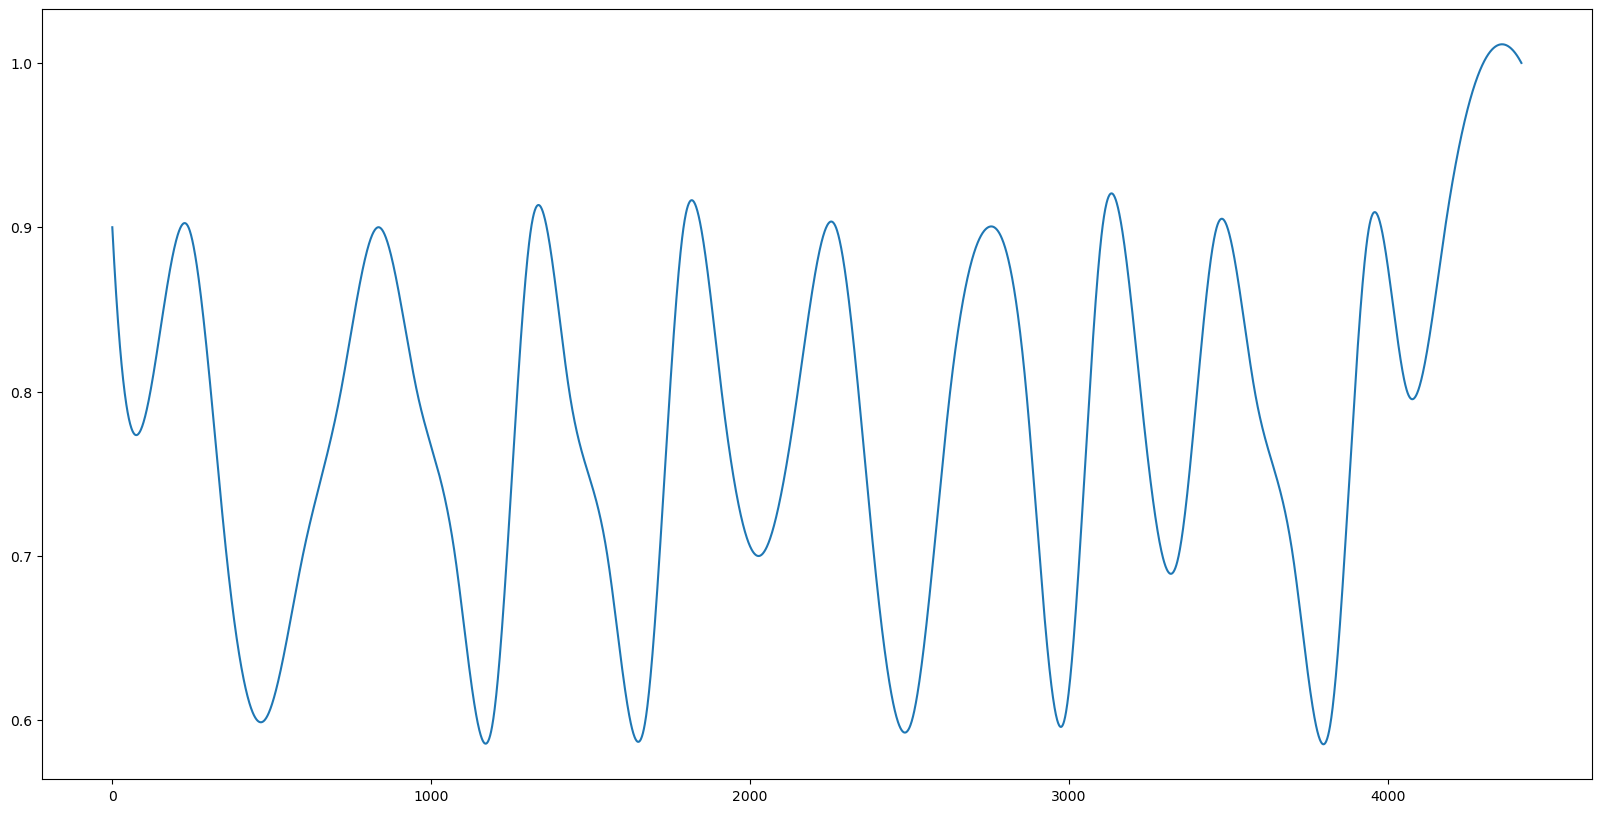

In [67]:
density_input = np.array([.9,  .8, .9, .7, .6, .7, .8, .9, .8, .7, .6, .9, .8, .7, .6, .9, .8, .7, .8, .9, .7, .6, .8, .9, .8, .6, .9, .8, .7, .9, .8, .7, .6, .9, .8, .9, 1.0, 1.0])
density_function = dmu.build_density_function(density_input, 4420)
print(f'{density_function.shape = }')
Y = density_function
X = np.arange(0, density_function.shape[0], 1)
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(X, Y)
plt.show()